# PROJECT| Intro to Neural Networks

#### Data Description: Given a Bank customer, can we build a classifier that can determine whether they will leave or not using Neural networks?

The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance etc. Know your data: https://www.kaggle.com/barelydedicated/bank-
customer-churn-modeling.

Context:
Businesses like banks which provide service have to worry about problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a
customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### 1. Read the data set

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import os
os.chdir('G:\Residency6\PROJECT\Intro_to_NN_Project')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank.csv')

In [3]:
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Class Imbalance

### 2.Drop the columns which are unique for all users like IDs (2.5 points)

In [3]:
df.drop(labels = ['RowNumber','CustomerId','Surname'],axis=1,inplace = True)

In [8]:
df.shape

(10000, 11)

### 3.Distinguish the feature and target set (2.5 points)

In [4]:
X = df.iloc[:,0:10]
y = df['Exited']

In [5]:
#Selecting columns of "object" datatype
for feature in X.columns: # Loop through all columns in the dataframe
   if X[feature].dtype == 'object':
    print(feature)    

Geography
Gender


Converting datatypes

In [6]:
X1 = pd.get_dummies(X, columns=['Geography', 'Gender'])

In [7]:
X1.head(4)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0


In [8]:
X1.shape

(10000, 13)

### 4.Divide the data set into training and test sets ( 2.5 points)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=.20, random_state= 1)

In [10]:
X_train.shape

(8000, 13)

In [11]:
X_test.shape

(2000, 13)

### 5.Normalize the train and test data (5 points)

In [12]:
 from sklearn.preprocessing import StandardScaler
 sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 6.Initialize & build the model (10 points)

In [13]:
import keras
from keras.models import Sequential #Helps you build the NN
from keras.layers import Dense # Takes care of randomly initialized weights

Using TensorFlow backend.


In [14]:
classifier = Sequential()

In [15]:
classifier.add(Dense(7, input_shape=(13,), activation='relu'))
classifier.add(Dense(6, activation='relu'))
classifier.add(Dense(1, activation='relu'))
classifier.compile(optimizer = 'adam' ,loss = 'binary_crossentropy', metrics = ['accuracy'] )

In [16]:
classifier.fit(X_train, y_train, batch_size=30, epochs=30)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/30
8000/8000 [==============================] - 0s 56us/step - loss: 2.0861 - accuracy: 0.7563
Epoch 2/30
8000/8000 [==============================] - 0s 36us/step - loss: 1.2943 - accuracy: 0.7555
Epoch 3/30
8000/8000 [==============================] - 0s 37us/step - loss: 0.8558 - accuracy: 0.7566
Epoch 4/30
8000/8000 [==============================] - 0s 35us/step - loss: 0.6917 - accuracy: 0.7795
Epoch 5/30
8000/8000 [==============================] - 0s 35us/step - loss: 0.6059 - accuracy: 0.7904
Epoch 6/30
8000/8000 [==============================] - 0s 38us/step - loss: 0.5505 - accuracy: 0.7943
Epoch 7/30
8000/8000 [==============================] - 0s 34us/step - loss: 0.5095 - accuracy: 0.7975
Epoch 8/30
8000/8000 [==============================] - 0s 33us/step - loss: 0.4912 - accuracy: 0.8009
Epoch 9/30
8000/8000 [==============================] - 0s 39us/step - loss: 0.48

### 7.Predict the results using 0.5 as a threshold (5 points)

In [17]:
#predict the NN with the Test set and check for accuracy.
y_pred = classifier.predict(X_test)

In [18]:
y_pred = y_pred>0.5

In [19]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

### 8.Print the Accuracy score and confusion matrix (2.5 points)

In [20]:
from sklearn.metrics import confusion_matrix
confMatrix = confusion_matrix(y_test,y_pred)


In [21]:
confMatrix

array([[1533,   52],
       [ 282,  133]], dtype=int64)

In [40]:
#Returns the loss value & metrics values for the model in test mode.
score = classifier.evaluate(X_test,y_test)
print("Accuracy score : ",score)

2000/2000 [==============================] - 1s 305us/step
Accuracy score :  [0.37777027559280396, 0.8519999980926514]


In [30]:
# Creating a function to report confusion metrics
def confusion_metrics (confMatrix):
# save confusion matrix and slice into four pieces
    TP = confMatrix[1][1]
    TN = confMatrix[0][0]
    FP = confMatrix[0][1]
    FN = confMatrix[1][0]
    print("Neural Network Classification report :\n")
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')   
    
confusion_metrics (confMatrix)

Neural Network Classification report :

True Positives: 133
True Negatives: 1533
False Positives: 52
False Negatives: 282
--------------------------------------------------
Accuracy: 0.83
Mis-Classification: 0.17
Sensitivity: 0.32
Specificity: 0.97
Precision: 0.97
f_1 Score: 0.48


### Plot loss during training

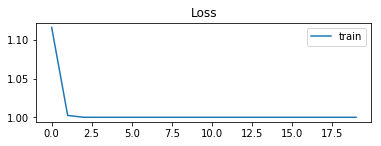

In [43]:
from matplotlib import pyplot
from numpy import where

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.legend()

### Tuning of parameters using K-Fold Crossvalidation

In [33]:
def build_classifier(optimizer) :
    classifier_1 = Sequential()
    classifier_1.add(Dense(7, input_shape=(13,), activation='relu'))
    classifier_1.add(Dense(6, activation='relu'))
    classifier_1.add(Dense(1, activation='relu'))
    classifier_1.compile(optimizer = 'adam' ,loss = 'binary_crossentropy', metrics = ['accuracy'] )
    classifier_1.fit(X_train, y_train, batch_size=30, epochs=30)
    return classifier

In [34]:
classifier_1 = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_classifier)

In [36]:
#Tuning of parameters using K-Fold Crossvalidation
from sklearn.model_selection import GridSearchCV
parameters={'batch_size':[25,32],'nb_epoch':[30,50],'optimizer':['adam','rmsprop']}
grid_Search=GridSearchCV(estimator=classifier_1,param_grid=parameters,scoring='accuracy',cv=10) #use gridsearch to find the best parameters from speceied list.
grid_search=grid_Search.fit(X_train,y_train)
best_param=grid_search.best_params_
best_accu=grid_search.best_score_

Epoch 1/30
8000/8000 [==============================] - 0s 48us/step - loss: 0.7555 - accuracy: 0.7154
Epoch 2/30
8000/8000 [==============================] - 0s 35us/step - loss: 0.5404 - accuracy: 0.7630
Epoch 3/30
8000/8000 [==============================] - 0s 34us/step - loss: 0.4918 - accuracy: 0.7815
Epoch 4/30
8000/8000 [==============================] - 0s 33us/step - loss: 0.4694 - accuracy: 0.7935
Epoch 5/30
8000/8000 [==============================] - 0s 33us/step - loss: 0.4535 - accuracy: 0.8016
Epoch 6/30
8000/8000 [==============================] - 0s 33us/step - loss: 0.4456 - accuracy: 0.8100
Epoch 7/30
8000/8000 [==============================] - 0s 33us/step - loss: 0.4478 - accuracy: 0.7980
Epoch 8/30
8000/8000 [==============================] - 0s 34us/step - loss: 0.4330 - accuracy: 0.8111
Epoch 9/30
8000/8000 [==============================] - 0s 34us/step - loss: 0.4250 - accuracy: 0.8171
Epoch 10/30
8000/8000 [==============================] - 0s 34us/step - l

8000/8000 [==============================] - 0s 34us/step - loss: 0.5307 - accuracy: 0.7993
Epoch 18/30
8000/8000 [==============================] - 0s 33us/step - loss: 0.5235 - accuracy: 0.8020
Epoch 19/30
8000/8000 [==============================] - 0s 33us/step - loss: 0.5081 - accuracy: 0.8036
Epoch 20/30
8000/8000 [==============================] - 0s 33us/step - loss: 0.5056 - accuracy: 0.8031
Epoch 21/30
8000/8000 [==============================] - 0s 33us/step - loss: 0.4915 - accuracy: 0.8005
Epoch 22/30
8000/8000 [==============================] - 0s 33us/step - loss: 0.4883 - accuracy: 0.8050
Epoch 23/30
8000/8000 [==============================] - 0s 33us/step - loss: 0.4769 - accuracy: 0.8065
Epoch 24/30
8000/8000 [==============================] - 0s 33us/step - loss: 0.4700 - accuracy: 0.8074
Epoch 25/30
8000/8000 [==============================] - 0s 33us/step - loss: 0.4677 - accuracy: 0.8083
Epoch 26/30
8000/8000 [==============================] - 0s 33us/step - loss

8000/8000 [==============================] - 0s 35us/step - loss: 0.5576 - accuracy: 0.7914
Epoch 4/30
8000/8000 [==============================] - 0s 36us/step - loss: 0.4969 - accuracy: 0.7885
Epoch 5/30
8000/8000 [==============================] - 0s 34us/step - loss: 0.4802 - accuracy: 0.7954
Epoch 6/30
8000/8000 [==============================] - 0s 35us/step - loss: 0.4683 - accuracy: 0.7995
Epoch 7/30
8000/8000 [==============================] - 0s 34us/step - loss: 0.4652 - accuracy: 0.7999
Epoch 8/30
8000/8000 [==============================] - 0s 34us/step - loss: 0.4618 - accuracy: 0.8023
Epoch 9/30
8000/8000 [==============================] - 0s 34us/step - loss: 0.4550 - accuracy: 0.8054
Epoch 10/30
8000/8000 [==============================] - 0s 34us/step - loss: 0.4427 - accuracy: 0.8049
Epoch 11/30
8000/8000 [==============================] - 0s 34us/step - loss: 0.4357 - accuracy: 0.8092
Epoch 12/30
8000/8000 [==============================] - 0s 34us/step - loss: 0.42

8000/8000 [==============================] - 0s 37us/step - loss: 0.4466 - accuracy: 0.8051
Epoch 21/30
8000/8000 [==============================] - 0s 36us/step - loss: 0.4476 - accuracy: 0.8051
Epoch 22/30
8000/8000 [==============================] - 0s 37us/step - loss: 0.4454 - accuracy: 0.8064
Epoch 23/30
8000/8000 [==============================] - 0s 36us/step - loss: 0.4424 - accuracy: 0.8092
Epoch 24/30
8000/8000 [==============================] - 0s 37us/step - loss: 0.4441 - accuracy: 0.8089
Epoch 25/30
8000/8000 [==============================] - 0s 36us/step - loss: 0.4385 - accuracy: 0.8075
Epoch 26/30
8000/8000 [==============================] - 0s 36us/step - loss: 0.4392 - accuracy: 0.8094
Epoch 27/30
8000/8000 [==============================] - 0s 37us/step - loss: 0.4369 - accuracy: 0.8098
Epoch 28/30
8000/8000 [==============================] - 0s 36us/step - loss: 0.4360 - accuracy: 0.8100
Epoch 29/30
8000/8000 [==============================] - 0s 37us/step - loss

8000/8000 [==============================] - 0s 39us/step - loss: 0.6426 - accuracy: 0.7701
Epoch 7/30
8000/8000 [==============================] - 0s 38us/step - loss: 0.6232 - accuracy: 0.7745
Epoch 8/30
8000/8000 [==============================] - 0s 37us/step - loss: 0.6111 - accuracy: 0.7804
Epoch 9/30
8000/8000 [==============================] - 0s 38us/step - loss: 0.5983 - accuracy: 0.7835
Epoch 10/30
8000/8000 [==============================] - 0s 37us/step - loss: 0.5903 - accuracy: 0.7883
Epoch 11/30
8000/8000 [==============================] - 0s 38us/step - loss: 0.5863 - accuracy: 0.7916
Epoch 12/30
8000/8000 [==============================] - 0s 38us/step - loss: 0.5607 - accuracy: 0.7926
Epoch 13/30
8000/8000 [==============================] - 0s 37us/step - loss: 0.5487 - accuracy: 0.7965
Epoch 14/30
8000/8000 [==============================] - 0s 39us/step - loss: 0.5396 - accuracy: 0.8004
Epoch 15/30
8000/8000 [==============================] - 0s 37us/step - loss: 0

8000/8000 [==============================] - 0s 38us/step - loss: 0.4445 - accuracy: 0.8043
Epoch 24/30
8000/8000 [==============================] - 0s 39us/step - loss: 0.4462 - accuracy: 0.8081
Epoch 25/30
8000/8000 [==============================] - 0s 39us/step - loss: 0.4391 - accuracy: 0.8095
Epoch 26/30
8000/8000 [==============================] - 0s 41us/step - loss: 0.4343 - accuracy: 0.8108
Epoch 27/30
8000/8000 [==============================] - 0s 38us/step - loss: 0.4338 - accuracy: 0.8135
Epoch 28/30
8000/8000 [==============================] - 0s 41us/step - loss: 0.4323 - accuracy: 0.8151
Epoch 29/30
8000/8000 [==============================] - 0s 39us/step - loss: 0.4271 - accuracy: 0.8173
Epoch 30/30
8000/8000 [==============================] - 0s 37us/step - loss: 0.4278 - accuracy: 0.8186
Epoch 1/1
7200/7200 [==============================] - 0s 45us/step - loss: 0.3645 - accuracy: 0.8546
Epoch 1/30
8000/8000 [==============================] - 1s 64us/step - loss: 2

8000/8000 [==============================] - 0s 40us/step - loss: 3.1274 - accuracy: 0.7972
Epoch 10/30
8000/8000 [==============================] - 0s 42us/step - loss: 3.1274 - accuracy: 0.7972
Epoch 11/30
8000/8000 [==============================] - 0s 46us/step - loss: 3.1274 - accuracy: 0.7972
Epoch 12/30
8000/8000 [==============================] - 0s 44us/step - loss: 3.1274 - accuracy: 0.7972
Epoch 13/30
8000/8000 [==============================] - 0s 47us/step - loss: 3.1274 - accuracy: 0.7972
Epoch 14/30
8000/8000 [==============================] - 0s 42us/step - loss: 3.1274 - accuracy: 0.7972
Epoch 15/30
8000/8000 [==============================] - 0s 46us/step - loss: 3.1274 - accuracy: 0.7972
Epoch 16/30
8000/8000 [==============================] - 0s 49us/step - loss: 3.1274 - accuracy: 0.7972
Epoch 17/30
8000/8000 [==============================] - 0s 44us/step - loss: 3.1274 - accuracy: 0.7972
Epoch 18/30
8000/8000 [==============================] - 0s 45us/step - loss

8000/8000 [==============================] - 0s 45us/step - loss: 0.3795 - accuracy: 0.8346
Epoch 27/30
8000/8000 [==============================] - 0s 43us/step - loss: 0.3776 - accuracy: 0.8346
Epoch 28/30
8000/8000 [==============================] - 0s 44us/step - loss: 0.3748 - accuracy: 0.8407
Epoch 29/30
8000/8000 [==============================] - 0s 44us/step - loss: 0.3719 - accuracy: 0.8390
Epoch 30/30
8000/8000 [==============================] - 0s 43us/step - loss: 0.3699 - accuracy: 0.8391
Epoch 1/1
7200/7200 [==============================] - 0s 53us/step - loss: 0.3649 - accuracy: 0.8526
Epoch 1/30
8000/8000 [==============================] - 1s 70us/step - loss: 1.3763 - accuracy: 0.7972
Epoch 2/30
8000/8000 [==============================] - 0s 45us/step - loss: 0.8347 - accuracy: 0.7945
Epoch 3/30
8000/8000 [==============================] - 0s 44us/step - loss: 0.5947 - accuracy: 0.7807
Epoch 4/30
8000/8000 [==============================] - 0s 49us/step - loss: 0.56

8000/8000 [==============================] - 0s 42us/step - loss: 0.4276 - accuracy: 0.8170
Epoch 13/30
8000/8000 [==============================] - 0s 43us/step - loss: 0.4212 - accuracy: 0.8176
Epoch 14/30
8000/8000 [==============================] - 0s 41us/step - loss: 0.4140 - accuracy: 0.8176
Epoch 15/30
8000/8000 [==============================] - 0s 41us/step - loss: 0.4147 - accuracy: 0.8230
Epoch 16/30
8000/8000 [==============================] - 0s 41us/step - loss: 0.4037 - accuracy: 0.8299
Epoch 17/30
8000/8000 [==============================] - 0s 43us/step - loss: 0.4018 - accuracy: 0.8301
Epoch 18/30
8000/8000 [==============================] - 0s 42us/step - loss: 0.4026 - accuracy: 0.8301
Epoch 19/30
8000/8000 [==============================] - 0s 43us/step - loss: 0.3922 - accuracy: 0.8332
Epoch 20/30
8000/8000 [==============================] - 0s 43us/step - loss: 0.3891 - accuracy: 0.8344
Epoch 21/30
8000/8000 [==============================] - 0s 41us/step - loss

8000/8000 [==============================] - 0s 43us/step - loss: 0.4579 - accuracy: 0.8086
Epoch 30/30
8000/8000 [==============================] - 0s 43us/step - loss: 0.4529 - accuracy: 0.8102
Epoch 1/1
7200/7200 [==============================] - 0s 52us/step - loss: 0.3732 - accuracy: 0.8421
Epoch 1/30
8000/8000 [==============================] - 1s 71us/step - loss: 2.9006 - accuracy: 0.7972
Epoch 2/30
8000/8000 [==============================] - 0s 41us/step - loss: 1.1708 - accuracy: 0.7809
Epoch 3/30
8000/8000 [==============================] - 0s 41us/step - loss: 0.5864 - accuracy: 0.7749
Epoch 4/30
8000/8000 [==============================] - 0s 41us/step - loss: 0.5262 - accuracy: 0.7940
Epoch 5/30
8000/8000 [==============================] - 0s 41us/step - loss: 0.5127 - accuracy: 0.7976
Epoch 6/30
8000/8000 [==============================] - 0s 41us/step - loss: 0.4906 - accuracy: 0.8014
Epoch 7/30
8000/8000 [==============================] - 0s 41us/step - loss: 0.4917 

8000/8000 [==============================] - 0s 46us/step - loss: 0.4872 - accuracy: 0.8069
Epoch 16/30
8000/8000 [==============================] - 0s 46us/step - loss: 0.4843 - accuracy: 0.8024
Epoch 17/30
8000/8000 [==============================] - 0s 45us/step - loss: 0.4645 - accuracy: 0.8076
Epoch 18/30
8000/8000 [==============================] - 0s 48us/step - loss: 0.4594 - accuracy: 0.8095
Epoch 19/30
8000/8000 [==============================] - 0s 46us/step - loss: 0.4591 - accuracy: 0.8120
Epoch 20/30
8000/8000 [==============================] - 0s 45us/step - loss: 0.4568 - accuracy: 0.8121
Epoch 21/30
8000/8000 [==============================] - 0s 46us/step - loss: 0.4508 - accuracy: 0.8133
Epoch 22/30
8000/8000 [==============================] - 0s 46us/step - loss: 0.4493 - accuracy: 0.8136
Epoch 23/30
8000/8000 [==============================] - 0s 46us/step - loss: 0.4481 - accuracy: 0.8139
Epoch 24/30
8000/8000 [==============================] - 0s 46us/step - loss

8000/8000 [==============================] - 1s 77us/step - loss: 1.7875 - accuracy: 0.7716
Epoch 2/30
8000/8000 [==============================] - 0s 47us/step - loss: 0.9091 - accuracy: 0.7760
Epoch 3/30
8000/8000 [==============================] - 0s 47us/step - loss: 0.6128 - accuracy: 0.7801
Epoch 4/30
8000/8000 [==============================] - 0s 47us/step - loss: 0.5657 - accuracy: 0.7909
Epoch 5/30
8000/8000 [==============================] - 0s 47us/step - loss: 0.5287 - accuracy: 0.7962
Epoch 6/30
8000/8000 [==============================] - 0s 47us/step - loss: 0.5146 - accuracy: 0.8012
Epoch 7/30
8000/8000 [==============================] - 0s 47us/step - loss: 0.5059 - accuracy: 0.8034
Epoch 8/30
8000/8000 [==============================] - 0s 48us/step - loss: 0.4948 - accuracy: 0.8067
Epoch 9/30
8000/8000 [==============================] - 0s 49us/step - loss: 0.4833 - accuracy: 0.8050
Epoch 10/30
8000/8000 [==============================] - 0s 48us/step - loss: 0.4712

8000/8000 [==============================] - 0s 58us/step - loss: 0.4444 - accuracy: 0.8098
Epoch 18/30
8000/8000 [==============================] - 0s 57us/step - loss: 0.4361 - accuracy: 0.8126
Epoch 19/30
8000/8000 [==============================] - 0s 59us/step - loss: 0.4331 - accuracy: 0.8130
Epoch 20/30
8000/8000 [==============================] - 0s 54us/step - loss: 0.4290 - accuracy: 0.8166
Epoch 21/30
8000/8000 [==============================] - 0s 56us/step - loss: 0.4240 - accuracy: 0.8188
Epoch 22/30
8000/8000 [==============================] - 0s 50us/step - loss: 0.4250 - accuracy: 0.8206
Epoch 23/30
8000/8000 [==============================] - 0s 57us/step - loss: 0.4448 - accuracy: 0.8273
Epoch 24/30
8000/8000 [==============================] - 0s 52us/step - loss: 0.4356 - accuracy: 0.8266
Epoch 25/30
8000/8000 [==============================] - 0s 61us/step - loss: 0.4303 - accuracy: 0.8265
Epoch 26/30
8000/8000 [==============================] - 0s 59us/step - loss

8000/8000 [==============================] - 0s 54us/step - loss: 1.5729 - accuracy: 0.7157
Epoch 4/30
8000/8000 [==============================] - 0s 56us/step - loss: 0.9267 - accuracy: 0.7460
Epoch 5/30
8000/8000 [==============================] - 0s 56us/step - loss: 0.6610 - accuracy: 0.7600
Epoch 6/30
8000/8000 [==============================] - 0s 54us/step - loss: 0.5918 - accuracy: 0.7731
Epoch 7/30
8000/8000 [==============================] - 0s 55us/step - loss: 0.5691 - accuracy: 0.7776
Epoch 8/30
8000/8000 [==============================] - 0s 56us/step - loss: 0.5403 - accuracy: 0.7818
Epoch 9/30
8000/8000 [==============================] - 0s 60us/step - loss: 0.5168 - accuracy: 0.7869
Epoch 10/30
8000/8000 [==============================] - 0s 55us/step - loss: 0.4949 - accuracy: 0.7905
Epoch 11/30
8000/8000 [==============================] - 0s 53us/step - loss: 0.4906 - accuracy: 0.7975
Epoch 12/30
8000/8000 [==============================] - 0s 54us/step - loss: 0.48

8000/8000 [==============================] - 1s 63us/step - loss: 0.5114 - accuracy: 0.8059
Epoch 21/30
8000/8000 [==============================] - 1s 67us/step - loss: 0.5062 - accuracy: 0.8055
Epoch 22/30
8000/8000 [==============================] - 0s 62us/step - loss: 0.5000 - accuracy: 0.8064
Epoch 23/30
8000/8000 [==============================] - 0s 61us/step - loss: 0.4967 - accuracy: 0.8077
Epoch 24/30
8000/8000 [==============================] - 1s 63us/step - loss: 0.4941 - accuracy: 0.8069
Epoch 25/30
8000/8000 [==============================] - 0s 60us/step - loss: 0.4913 - accuracy: 0.8070
Epoch 26/30
8000/8000 [==============================] - 1s 63us/step - loss: 0.4890 - accuracy: 0.8086
Epoch 27/30
8000/8000 [==============================] - 1s 68us/step - loss: 0.4854 - accuracy: 0.8087
Epoch 28/30
8000/8000 [==============================] - 0s 58us/step - loss: 0.4826 - accuracy: 0.8121
Epoch 29/30
8000/8000 [==============================] - 0s 61us/step - loss

8000/8000 [==============================] - 1s 63us/step - loss: 0.4057 - accuracy: 0.8273
Epoch 7/30
8000/8000 [==============================] - 1s 64us/step - loss: 0.3951 - accuracy: 0.8324
Epoch 8/30
8000/8000 [==============================] - 0s 61us/step - loss: 0.3867 - accuracy: 0.8375
Epoch 9/30
8000/8000 [==============================] - 1s 69us/step - loss: 0.3927 - accuracy: 0.8282
Epoch 10/30
8000/8000 [==============================] - 1s 70us/step - loss: 0.3783 - accuracy: 0.8375
Epoch 11/30
8000/8000 [==============================] - 1s 67us/step - loss: 0.3735 - accuracy: 0.8413
Epoch 12/30
8000/8000 [==============================] - 1s 63us/step - loss: 0.3703 - accuracy: 0.8441
Epoch 13/30
8000/8000 [==============================] - 1s 67us/step - loss: 0.3665 - accuracy: 0.8471
Epoch 14/30
8000/8000 [==============================] - 1s 67us/step - loss: 0.3645 - accuracy: 0.8476
Epoch 15/30
8000/8000 [==============================] - 1s 66us/step - loss: 0

8000/8000 [==============================] - 1s 69us/step - loss: 3.1274 - accuracy: 0.7972
Epoch 24/30
8000/8000 [==============================] - 1s 67us/step - loss: 3.1274 - accuracy: 0.7972
Epoch 25/30
8000/8000 [==============================] - 1s 68us/step - loss: 3.1274 - accuracy: 0.7972
Epoch 26/30
8000/8000 [==============================] - 1s 63us/step - loss: 3.1274 - accuracy: 0.7972
Epoch 27/30
8000/8000 [==============================] - 0s 61us/step - loss: 3.1274 - accuracy: 0.7972
Epoch 28/30
8000/8000 [==============================] - 1s 64us/step - loss: 3.1274 - accuracy: 0.7972
Epoch 29/30
8000/8000 [==============================] - 1s 63us/step - loss: 3.1274 - accuracy: 0.7972
Epoch 30/30
8000/8000 [==============================] - 0s 62us/step - loss: 3.1274 - accuracy: 0.7972
Epoch 1/1
7200/7200 [==============================] - 0s 60us/step - loss: 0.3544 - accuracy: 0.8501
Epoch 1/30
8000/8000 [==============================] - 1s 114us/step - loss: 

8000/8000 [==============================] - 1s 66us/step - loss: 0.8548 - accuracy: 0.7444
Epoch 10/30
8000/8000 [==============================] - 0s 62us/step - loss: 0.8104 - accuracy: 0.7516
Epoch 11/30
8000/8000 [==============================] - 1s 64us/step - loss: 0.7160 - accuracy: 0.7534
Epoch 12/30
8000/8000 [==============================] - 1s 66us/step - loss: 0.6582 - accuracy: 0.7591
Epoch 13/30
8000/8000 [==============================] - 1s 66us/step - loss: 0.6165 - accuracy: 0.7639
Epoch 14/30
8000/8000 [==============================] - 1s 65us/step - loss: 0.5994 - accuracy: 0.7716
Epoch 15/30
8000/8000 [==============================] - 1s 63us/step - loss: 0.5775 - accuracy: 0.7774
Epoch 16/30
8000/8000 [==============================] - 1s 79us/step - loss: 0.5487 - accuracy: 0.7782
Epoch 17/30
8000/8000 [==============================] - 1s 75us/step - loss: 0.5347 - accuracy: 0.7870
Epoch 18/30
8000/8000 [==============================] - 1s 63us/step - loss

8000/8000 [==============================] - 1s 67us/step - loss: 0.4257 - accuracy: 0.8256
Epoch 27/30
8000/8000 [==============================] - 1s 68us/step - loss: 0.4076 - accuracy: 0.8286
Epoch 28/30
8000/8000 [==============================] - 1s 67us/step - loss: 0.3973 - accuracy: 0.8310
Epoch 29/30
8000/8000 [==============================] - 1s 67us/step - loss: 0.3921 - accuracy: 0.8338
Epoch 30/30
8000/8000 [==============================] - 1s 67us/step - loss: 0.3868 - accuracy: 0.8341
Epoch 1/1
7200/7200 [==============================] - 0s 61us/step - loss: 0.3450 - accuracy: 0.8544
Epoch 1/30
8000/8000 [==============================] - 1s 112us/step - loss: 2.0802 - accuracy: 0.6053
Epoch 2/30
8000/8000 [==============================] - 1s 67us/step - loss: 1.1642 - accuracy: 0.7115
Epoch 3/30
8000/8000 [==============================] - 1s 66us/step - loss: 0.9022 - accuracy: 0.7421
Epoch 4/30
8000/8000 [==============================] - 1s 66us/step - loss: 0.7

8000/8000 [==============================] - 1s 70us/step - loss: 0.4765 - accuracy: 0.7986
Epoch 13/30
8000/8000 [==============================] - 1s 67us/step - loss: 0.4703 - accuracy: 0.8006
Epoch 14/30
8000/8000 [==============================] - 1s 68us/step - loss: 0.4669 - accuracy: 0.8020
Epoch 15/30
8000/8000 [==============================] - 1s 68us/step - loss: 0.4643 - accuracy: 0.8027
Epoch 16/30
8000/8000 [==============================] - 1s 67us/step - loss: 0.4609 - accuracy: 0.8037
Epoch 17/30
8000/8000 [==============================] - 1s 71us/step - loss: 0.4571 - accuracy: 0.8060
Epoch 18/30
8000/8000 [==============================] - 1s 69us/step - loss: 0.4520 - accuracy: 0.8073
Epoch 19/30
8000/8000 [==============================] - 1s 69us/step - loss: 0.4447 - accuracy: 0.8090
Epoch 20/30
8000/8000 [==============================] - 1s 69us/step - loss: 0.4446 - accuracy: 0.8094
Epoch 21/30
8000/8000 [==============================] - 1s 69us/step - loss

8000/8000 [==============================] - 1s 71us/step - loss: 0.3831 - accuracy: 0.8432
Epoch 29/30
8000/8000 [==============================] - 1s 68us/step - loss: 0.3848 - accuracy: 0.8399
Epoch 30/30
8000/8000 [==============================] - 1s 70us/step - loss: 0.3782 - accuracy: 0.8419
Epoch 1/1
7200/7200 [==============================] - 0s 65us/step - loss: 0.3575 - accuracy: 0.8506
Epoch 1/30
8000/8000 [==============================] - 1s 119us/step - loss: 0.9140 - accuracy: 0.7615
Epoch 2/30
8000/8000 [==============================] - 1s 69us/step - loss: 0.6320 - accuracy: 0.7673
Epoch 3/30
8000/8000 [==============================] - 1s 70us/step - loss: 0.5530 - accuracy: 0.7834
Epoch 4/30
8000/8000 [==============================] - 1s 69us/step - loss: 0.5156 - accuracy: 0.7921
Epoch 5/30
8000/8000 [==============================] - 1s 71us/step - loss: 0.5007 - accuracy: 0.7952 0s - loss: 0.4922 - accura
Epoch 6/30
8000/8000 [==============================] -

8000/8000 [==============================] - 1s 71us/step - loss: 0.4572 - accuracy: 0.8112
Epoch 14/30
8000/8000 [==============================] - 1s 72us/step - loss: 0.4552 - accuracy: 0.8111
Epoch 15/30
8000/8000 [==============================] - 1s 69us/step - loss: 0.4523 - accuracy: 0.8131
Epoch 16/30
8000/8000 [==============================] - 1s 70us/step - loss: 0.4494 - accuracy: 0.8142
Epoch 17/30
8000/8000 [==============================] - 1s 72us/step - loss: 0.4456 - accuracy: 0.8146
Epoch 18/30
8000/8000 [==============================] - 1s 69us/step - loss: 0.4416 - accuracy: 0.8148
Epoch 19/30
8000/8000 [==============================] - 1s 71us/step - loss: 0.4383 - accuracy: 0.8152
Epoch 20/30
8000/8000 [==============================] - 1s 71us/step - loss: 0.4353 - accuracy: 0.8176
Epoch 21/30
8000/8000 [==============================] - 1s 71us/step - loss: 0.4329 - accuracy: 0.8188
Epoch 22/30
8000/8000 [==============================] - 1s 73us/step - loss

8000/8000 [==============================] - 1s 77us/step - loss: 0.3929 - accuracy: 0.8303
Epoch 30/30
8000/8000 [==============================] - 1s 74us/step - loss: 0.3891 - accuracy: 0.8289
Epoch 1/1
7200/7200 [==============================] - 0s 68us/step - loss: 0.3488 - accuracy: 0.8547
Epoch 1/30
8000/8000 [==============================] - 1s 126us/step - loss: 0.9688 - accuracy: 0.7706
Epoch 2/30
8000/8000 [==============================] - 1s 74us/step - loss: 0.5927 - accuracy: 0.7890
Epoch 3/30
8000/8000 [==============================] - 1s 75us/step - loss: 0.4978 - accuracy: 0.7984
Epoch 4/30
8000/8000 [==============================] - 1s 75us/step - loss: 0.4926 - accuracy: 0.8037
Epoch 5/30
8000/8000 [==============================] - 1s 74us/step - loss: 0.4791 - accuracy: 0.8050
Epoch 6/30
8000/8000 [==============================] - 1s 74us/step - loss: 0.4810 - accuracy: 0.8067
Epoch 7/30
8000/8000 [==============================] - 1s 75us/step - loss: 0.4642

8000/8000 [==============================] - 1s 81us/step - loss: 0.3971 - accuracy: 0.8326
Epoch 16/30
8000/8000 [==============================] - 1s 79us/step - loss: 0.3923 - accuracy: 0.8319
Epoch 17/30
8000/8000 [==============================] - 1s 90us/step - loss: 0.3840 - accuracy: 0.8344
Epoch 18/30
8000/8000 [==============================] - 1s 81us/step - loss: 0.3788 - accuracy: 0.8361
Epoch 19/30
8000/8000 [==============================] - 1s 78us/step - loss: 0.3744 - accuracy: 0.8381
Epoch 20/30
8000/8000 [==============================] - 1s 74us/step - loss: 0.3700 - accuracy: 0.8403
Epoch 21/30
8000/8000 [==============================] - 1s 78us/step - loss: 0.3678 - accuracy: 0.8395
Epoch 22/30
8000/8000 [==============================] - 1s 83us/step - loss: 0.3665 - accuracy: 0.8371
Epoch 23/30
8000/8000 [==============================] - 1s 80us/step - loss: 0.3665 - accuracy: 0.8411
Epoch 24/30
8000/8000 [==============================] - 1s 75us/step - loss

8000/8000 [==============================] - 1s 137us/step - loss: 3.1274 - accuracy: 0.7972
Epoch 2/30
8000/8000 [==============================] - 1s 80us/step - loss: 3.1274 - accuracy: 0.7972
Epoch 3/30
8000/8000 [==============================] - 1s 79us/step - loss: 3.1274 - accuracy: 0.7972
Epoch 4/30
8000/8000 [==============================] - 1s 80us/step - loss: 3.1274 - accuracy: 0.7972
Epoch 5/30
8000/8000 [==============================] - 1s 86us/step - loss: 3.1274 - accuracy: 0.7972
Epoch 6/30
8000/8000 [==============================] - 1s 80us/step - loss: 3.1274 - accuracy: 0.7972
Epoch 7/30
8000/8000 [==============================] - 1s 79us/step - loss: 3.1274 - accuracy: 0.7972
Epoch 8/30
8000/8000 [==============================] - 1s 80us/step - loss: 3.1274 - accuracy: 0.7972
Epoch 9/30
8000/8000 [==============================] - 1s 80us/step - loss: 3.1274 - accuracy: 0.7972
Epoch 10/30
8000/8000 [==============================] - 1s 77us/step - loss: 3.127

8000/8000 [==============================] - 1s 73us/step - loss: 0.4127 - accuracy: 0.8209
Epoch 19/30
8000/8000 [==============================] - 1s 72us/step - loss: 0.4088 - accuracy: 0.8231
Epoch 20/30
8000/8000 [==============================] - 1s 72us/step - loss: 0.4103 - accuracy: 0.8266
Epoch 21/30
8000/8000 [==============================] - 1s 71us/step - loss: 0.4042 - accuracy: 0.8276
Epoch 22/30
8000/8000 [==============================] - 1s 73us/step - loss: 0.4017 - accuracy: 0.8305
Epoch 23/30
8000/8000 [==============================] - 1s 73us/step - loss: 0.3950 - accuracy: 0.8309
Epoch 24/30
8000/8000 [==============================] - 1s 72us/step - loss: 0.3926 - accuracy: 0.8365
Epoch 25/30
8000/8000 [==============================] - 1s 73us/step - loss: 0.3884 - accuracy: 0.8390
Epoch 26/30
8000/8000 [==============================] - 1s 72us/step - loss: 0.3851 - accuracy: 0.8410
Epoch 27/30
8000/8000 [==============================] - 1s 73us/step - loss

8000/8000 [==============================] - 1s 76us/step - loss: 0.6218 - accuracy: 0.7931
Epoch 5/30
8000/8000 [==============================] - 1s 76us/step - loss: 0.5546 - accuracy: 0.7999
Epoch 6/30
8000/8000 [==============================] - 1s 76us/step - loss: 0.5201 - accuracy: 0.8080
Epoch 7/30
8000/8000 [==============================] - 1s 76us/step - loss: 0.4928 - accuracy: 0.8099
Epoch 8/30
8000/8000 [==============================] - 1s 76us/step - loss: 0.4600 - accuracy: 0.8160
Epoch 9/30
8000/8000 [==============================] - 1s 76us/step - loss: 0.4502 - accuracy: 0.8190
Epoch 10/30
8000/8000 [==============================] - 1s 77us/step - loss: 0.4441 - accuracy: 0.8205
Epoch 11/30
8000/8000 [==============================] - 1s 76us/step - loss: 0.4374 - accuracy: 0.8232
Epoch 12/30
8000/8000 [==============================] - 1s 76us/step - loss: 0.4315 - accuracy: 0.8206
Epoch 13/30
8000/8000 [==============================] - 1s 76us/step - loss: 0.4

8000/8000 [==============================] - 1s 88us/step - loss: 0.4089 - accuracy: 0.8314
Epoch 22/30
8000/8000 [==============================] - 1s 89us/step - loss: 0.4106 - accuracy: 0.8322
Epoch 23/30
8000/8000 [==============================] - 1s 88us/step - loss: 0.4040 - accuracy: 0.8336
Epoch 24/30
8000/8000 [==============================] - 1s 80us/step - loss: 0.4138 - accuracy: 0.8276
Epoch 25/30
8000/8000 [==============================] - 1s 78us/step - loss: 0.4031 - accuracy: 0.8322
Epoch 26/30
8000/8000 [==============================] - 1s 85us/step - loss: 0.3974 - accuracy: 0.8361
Epoch 27/30
8000/8000 [==============================] - 1s 79us/step - loss: 0.3942 - accuracy: 0.8369
Epoch 28/30
8000/8000 [==============================] - 1s 92us/step - loss: 0.3916 - accuracy: 0.8379
Epoch 29/30
8000/8000 [==============================] - 1s 85us/step - loss: 0.3940 - accuracy: 0.8378
Epoch 30/30
8000/8000 [==============================] - 1s 84us/step - loss

8000/8000 [==============================] - 1s 87us/step - loss: 0.6075 - accuracy: 0.7926
Epoch 8/30
8000/8000 [==============================] - 1s 86us/step - loss: 0.5552 - accuracy: 0.7981
Epoch 9/30
8000/8000 [==============================] - 1s 87us/step - loss: 0.5085 - accuracy: 0.8016
Epoch 10/30
8000/8000 [==============================] - 1s 87us/step - loss: 0.4977 - accuracy: 0.8052
Epoch 11/30
8000/8000 [==============================] - 1s 87us/step - loss: 0.4913 - accuracy: 0.8085
Epoch 12/30
8000/8000 [==============================] - 1s 93us/step - loss: 0.4858 - accuracy: 0.8098
Epoch 13/30
8000/8000 [==============================] - 1s 87us/step - loss: 0.4800 - accuracy: 0.8100
Epoch 14/30
8000/8000 [==============================] - 1s 87us/step - loss: 0.4765 - accuracy: 0.8112
Epoch 15/30
8000/8000 [==============================] - 1s 87us/step - loss: 0.4707 - accuracy: 0.8136
Epoch 16/30
8000/8000 [==============================] - 1s 88us/step - loss: 

8000/8000 [==============================] - 1s 98us/step - loss: 0.4259 - accuracy: 0.8163
Epoch 25/30
8000/8000 [==============================] - 1s 93us/step - loss: 0.4214 - accuracy: 0.8199
Epoch 26/30
8000/8000 [==============================] - 1s 94us/step - loss: 0.4197 - accuracy: 0.8167
Epoch 27/30
8000/8000 [==============================] - 1s 97us/step - loss: 0.4180 - accuracy: 0.8179
Epoch 28/30
8000/8000 [==============================] - 1s 94us/step - loss: 0.4185 - accuracy: 0.8201
Epoch 29/30
8000/8000 [==============================] - 1s 96us/step - loss: 0.4174 - accuracy: 0.8205
Epoch 30/30
8000/8000 [==============================] - 1s 97us/step - loss: 0.4130 - accuracy: 0.8230
Epoch 1/1
7200/7200 [==============================] - 1s 85us/step - loss: 0.3526 - accuracy: 0.8494
Epoch 1/30
8000/8000 [==============================] - 1s 165us/step - loss: 2.4979 - accuracy: 0.6146
Epoch 2/30
8000/8000 [==============================] - 1s 102us/step - loss: 

8000/8000 [==============================] - 1s 93us/step - loss: 0.5608 - accuracy: 0.7775
Epoch 11/30
8000/8000 [==============================] - 1s 91us/step - loss: 0.5416 - accuracy: 0.7868
Epoch 12/30
8000/8000 [==============================] - 1s 93us/step - loss: 0.5183 - accuracy: 0.7895
Epoch 13/30
8000/8000 [==============================] - 1s 91us/step - loss: 0.5234 - accuracy: 0.7941
Epoch 14/30
8000/8000 [==============================] - 1s 91us/step - loss: 0.5071 - accuracy: 0.7943
Epoch 15/30
8000/8000 [==============================] - 1s 91us/step - loss: 0.5048 - accuracy: 0.7952
Epoch 16/30
8000/8000 [==============================] - 1s 91us/step - loss: 0.5036 - accuracy: 0.7897
Epoch 17/30
8000/8000 [==============================] - 1s 93us/step - loss: 0.4913 - accuracy: 0.7995
Epoch 18/30
8000/8000 [==============================] - 1s 91us/step - loss: 0.4860 - accuracy: 0.8021
Epoch 19/30
8000/8000 [==============================] - 1s 91us/step - loss

Epoch 27/30
8000/8000 [==============================] - 1s 102us/step - loss: 0.3918 - accuracy: 0.8429
Epoch 28/30
8000/8000 [==============================] - 1s 100us/step - loss: 0.3833 - accuracy: 0.8462
Epoch 29/30
8000/8000 [==============================] - 1s 99us/step - loss: 0.3752 - accuracy: 0.8432
Epoch 30/30
8000/8000 [==============================] - 1s 98us/step - loss: 0.3719 - accuracy: 0.8457
Epoch 1/1
7200/7200 [==============================] - 1s 91us/step - loss: 0.3504 - accuracy: 0.8519
Epoch 1/30
8000/8000 [==============================] - 1s 168us/step - loss: 1.9283 - accuracy: 0.7797
Epoch 2/30
8000/8000 [==============================] - 1s 100us/step - loss: 1.5854 - accuracy: 0.7697
Epoch 3/30
8000/8000 [==============================] - 1s 101us/step - loss: 1.3023 - accuracy: 0.7641
Epoch 4/30
8000/8000 [==============================] - 1s 103us/step - loss: 1.0312 - accuracy: 0.7579
Epoch 5/30
8000/8000 [==============================] - 1s 100us

In [37]:
best_param

{'batch_size': 32, 'nb_epoch': 50, 'optimizer': 'adam'}

In [38]:
best_accu

0.858875

The best accuracy is 85.90%